In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
mydata = pd.read_csv("/content/Housing (1).csv")

In [ ]:
mydata.shape


(545, 13)

In [ ]:
mydata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
mydata.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
mydata.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df_encoded = pd.get_dummies(mydata,columns=categorical_columns,drop_first=True,dtype=int)
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1  

In [ ]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
df_encoded.dtypes


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
parking,int64
mainroad_yes,int64
guestroom_yes,int64
basement_yes,int64
hotwaterheating_yes,int64


In [ ]:
df_encoded.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


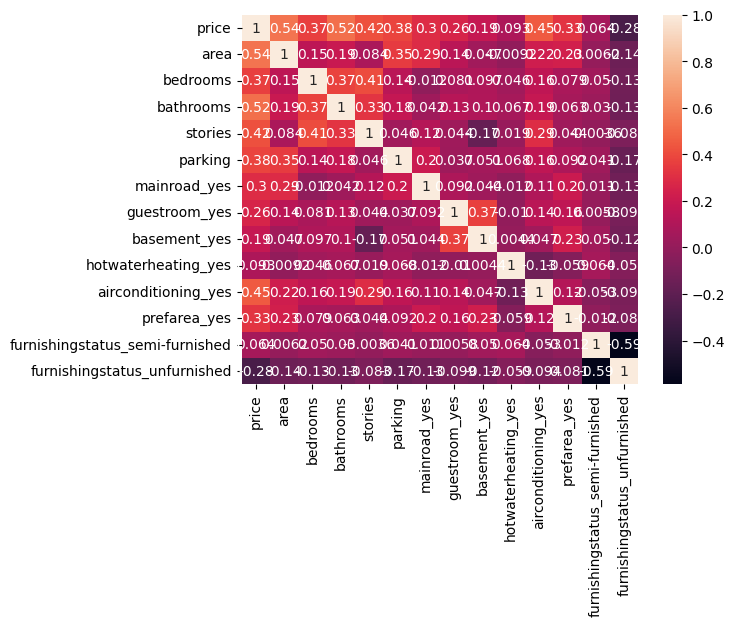

In [ ]:
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [ ]:
columns_to_drop = ['bathrooms','stories']
mydata_cleaned = df_encoded.drop(columns = columns_to_drop,axis=1)
mydata_cleaned.head()


,price,area,bedrooms,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,2,1,1,1,0,1,0,0,0


In [ ]:
mydata_attr =  mydata_cleaned.drop(['price'],axis=1)
mydata_price = mydata_cleaned['price']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(mydata_attr,mydata_price,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(436, 11)

In [ ]:
x_test.shape

(109, 11)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression_model.score(x_train,y_train)

0.5728404967490124

In [ ]:
regression_model.score(x_test,y_test)

0.5611739290713945